In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Itvedant CR3-08\Documents\DILIP\MLmain\ML_Files\Startups.csv")
df.head(5)

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

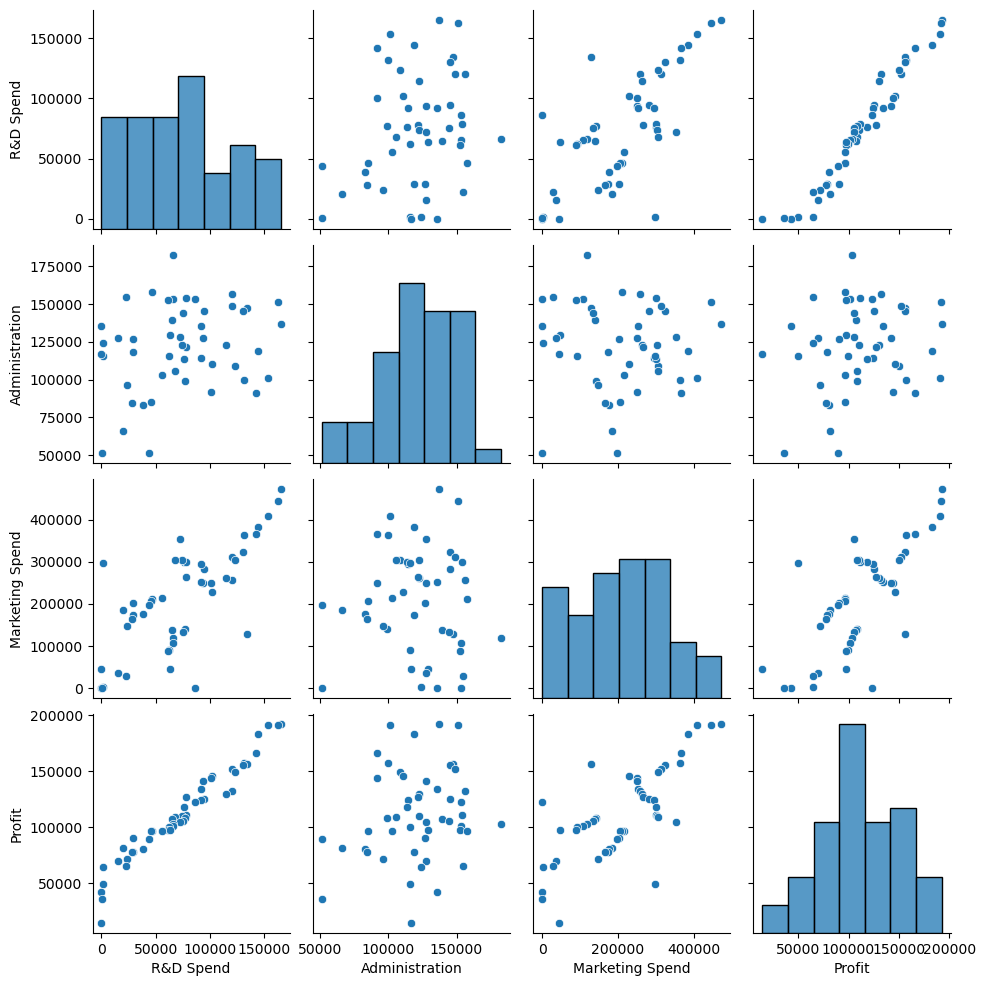

In [5]:
sns.pairplot(df)

<Axes: >

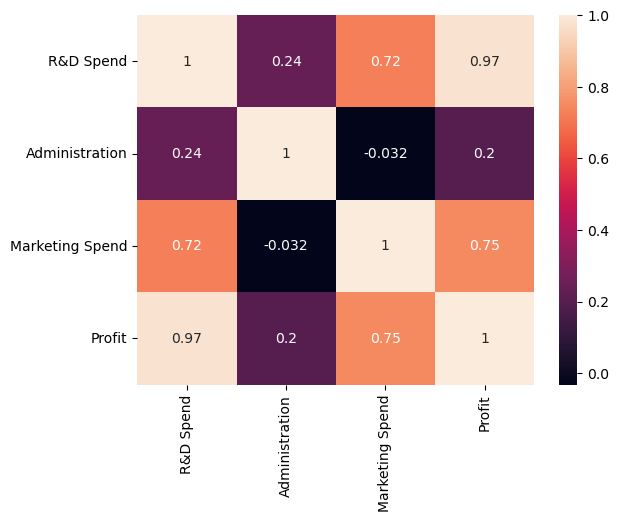

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
# from sklearn.preprocessing import OrdinalEncoder
# oe=OrdinalEncoder()
# df["State"]=oe.fit_transform(df[["State"]])


In [8]:
df.head(5)

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [9]:
df["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [10]:
df["State"]=df["State"].map({"New York":0,"California":1,"Florida":2}).astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [11]:
features=df.iloc[:,[0,1,2,3]]
target=df.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(features,target,random_state=0,test_size=0.25)


In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)

In [50]:
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(ytest,pred)
r2=r2_score(ytest,pred)
print(f"mean_squared_error:{mse}\n r2_score :{r2}")


mean_squared_error:119208783.35370074
 r2_score :0.8894979041083383


In [51]:
train=[]
test=[]

for i in range(1,10):   
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    tr=knn.score(xtrain,ytrain)
    te=knn.score(xtest,ytest)
    train.append(tr)
    test.append(te)

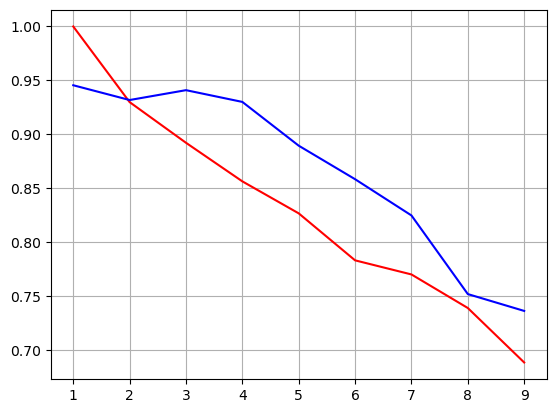

In [52]:
plt.plot(range(1,10),train,color="red")
plt.plot(range(1,10),test,color="blue")
plt.grid()

In [54]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
mse= mean_squared_error(ytest,pred)
r2=r2_score(ytest,pred)
print(f"mean_squared_error:{mse}\n r2_score :{r2}")

mean_squared_error:73544252.143927
 r2_score :0.9318272213333811
